
# The irreducible mass of black holes

A rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by Misner, Thorne and Weeler). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by Christodoulou 1970 and is closely related to the even more famous area law by Hawking (1971) (which in turns is the foundation of black-hole thermodynamics).

For a BH of mass $M$ and spin $\chi \in [0, 1]$, the irreducible mass is

$$ M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} $$ 

For convenience, let us define

$$ f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{irr}}{M} $$ 

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the posterior samples from a single measurement.

Let's assume that
- the spin $\chi$ is uniformly distributed between $0$ and $1$;
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

## Tasks

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu = 1$ in your code and remember that all masses in the problem are measured in units of $\mu$.
2. Plot the resulting pdf of $M_{irr}$. First try an histogram with one of the rules of thumb we've seen above.

Hint: You don't know the functional form of the pdf of $M_{irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!


3. Using the same samples, plot the distribution of $M_{irr}$ using a KDE.
4. Compute the KS distance between $M_{irr}$ and $f$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.
5. Compute the KS distance between $M_{irr}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.
6. You should find that (i) $M_{irr}$ is distributed like $f$ for $\sigma<<\mu$ and (ii) $M_{irr}$ is distributed like $M$ for $\sigma>>\mu$.
7. Compute the pdfs of $M_{irr}$ from their mathematical definitions, plot them, and check that they agree with your KDE.

Hint for point 7: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
$$\pi(f) = 2\frac{2f^2 -1}{\sqrt{1-f^2}} $$

Another hint: Then compute the pdf of $M_{irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic:
$$p(M_{irr}) = \frac{\sqrt{2/\pi}}{\sigma} \int_{1\sqrt{2}}^{1} exp \left[-\frac{(M_{irr}/f-\mu)^2}{2\sigma^2}\right] \frac{2f^2 -1}{f\sqrt{1-f^2}} df$$ 
This can be easily solved numerically.

Yet another hint: If any any time you get lost in the calculation, it helps checking that your pdfs are normalized as they should.


### Rules of thumb

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.hist import hist as fancyhist
import scipy.stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

def f_func(chi):
    return np.sqrt((1+np.sqrt(1-chi**2))/2)

def kde_sklearn(data, bandwidth, kernel, xgrid):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])

    return np.exp(log_pdf)

mu = 1
sigma = 0.02
N = 10000

In [2]:
chi = np.random.uniform(low = 0, high = 1, size = N)
mass = np.random.normal(loc = mu, scale = sigma, size = N)
m_irr = f_func(chi)*mass

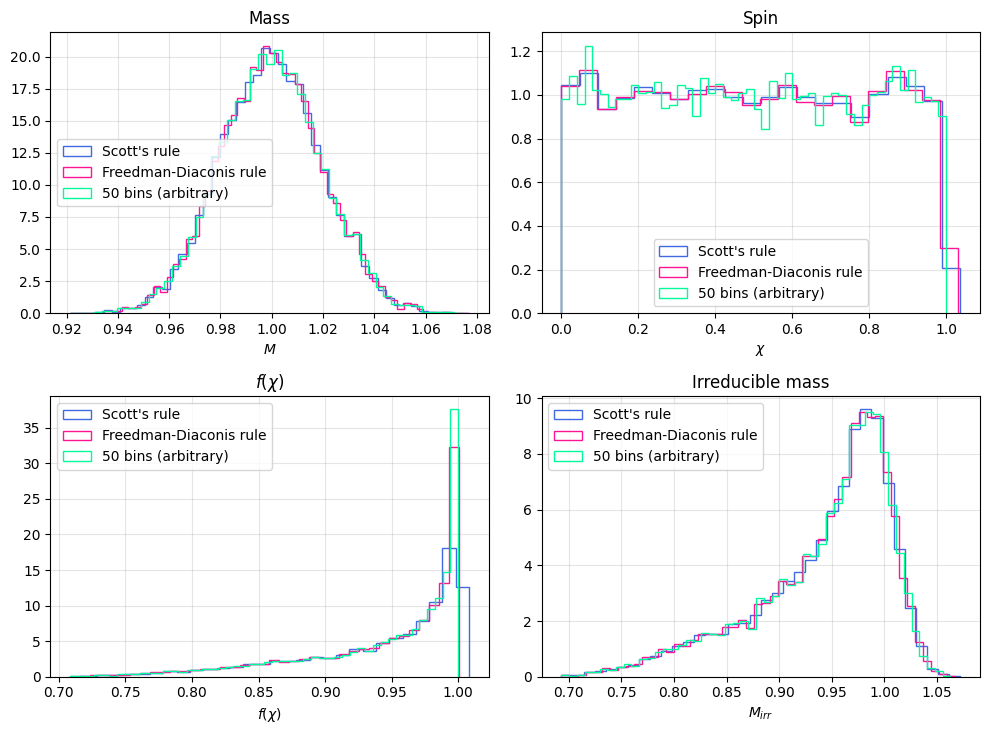

In [32]:
# Representing the histograms with the rules of thumb

Nbins = 50     # Just to check how the histograms would come out with a number of bins I'd normally use

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Mass
fancyhist(mass, bins='scott', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(mass, bins='freedman', density = True, ax = ax[0, 0], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[0, 0].hist(mass, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_xlabel('$M$')
ax[0, 0].set_title('Mass')

# Spin
fancyhist(chi, bins='scott', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(chi, bins='freedman', density = True, ax = ax[0, 1], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[0, 1].hist(chi, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_xlabel('$\\chi$')
ax[0, 1].set_title('Spin')

# f
fancyhist(f_func(chi), bins='scott', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(f_func(chi), bins='freedman', density = True, ax = ax[1, 0], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[1, 0].hist(f_func(chi), bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_xlabel('$f(\\chi)$')
ax[1, 0].set_title('$f(\\chi)$')

# Irreducible mass
fancyhist(m_irr, bins='scott', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'royalblue', label="Scott's rule")
fancyhist(m_irr, bins='freedman', density = True, ax = ax[1, 1], histtype = 'step', linewidth = 1,  color = 'deeppink', label="Freedman-Diaconis rule")
ax[1, 1].hist(m_irr, bins=Nbins, density = True, histtype = 'step', linewidth = 1,  color = 'mediumspringgreen', label="50 bins (arbitrary)")
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_xlabel('$M_{irr}$')
ax[1, 1].set_title('Irreducible mass')

plt.subplots_adjust(hspace=0.2)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()


We can also plot the mathematical distributions (with only one histogram as a reference):

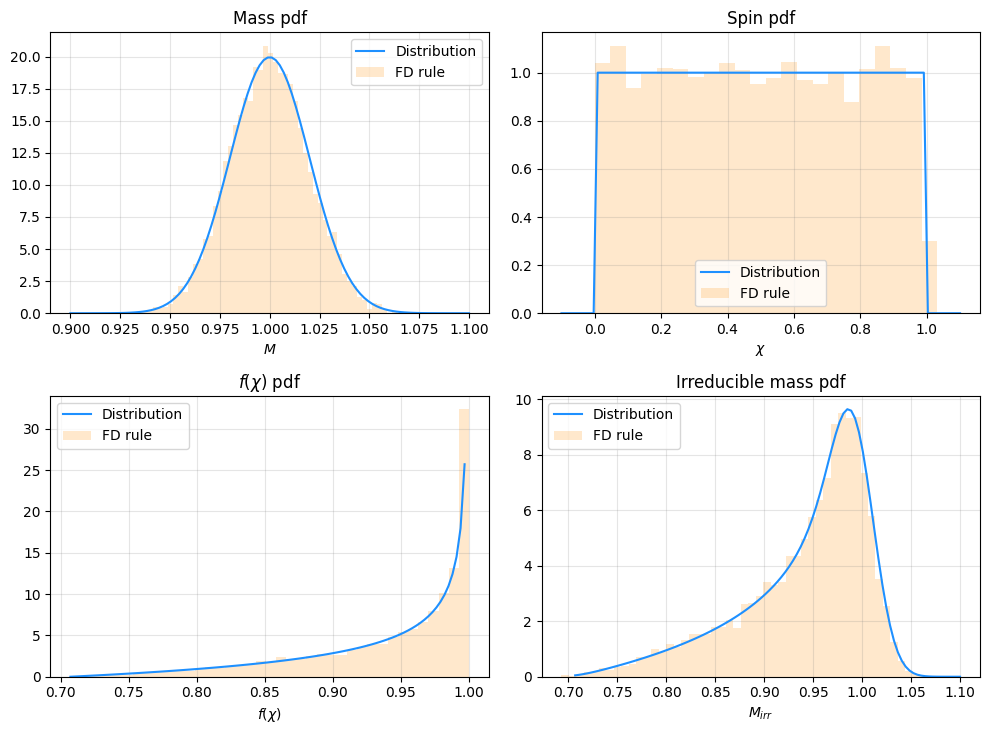

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#---------------------------------------------------------------------------------------------------------------------------------------
# Mass pdf
M_distr = scipy.stats.norm(loc=1,scale=sigma)
M_grid = np.linspace(0.9, 1.1, 100)

ax[0, 0].plot(M_grid, M_distr.pdf(M_grid), color = 'dodgerblue', lw = 1.5, label = 'Distribution')
fancyhist(mass, bins='freedman', density = True, ax = ax[0, 0], histtype = 'stepfilled', linewidth = 1,  color = 'darkorange', alpha = 0.2, label="FD rule")
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend(loc = 'best')
ax[0, 0].set_xlabel('$M$')
ax[0, 0].set_title('Mass pdf')

#---------------------------------------------------------------------------------------------------------------------------------------
# Spin pdf
chi_distr = scipy.stats.uniform(0, 1)
chi_grid = np.linspace(-0.1, 1.1, 100)

ax[0, 1].plot(chi_grid, chi_distr.pdf(chi_grid), color = 'dodgerblue', lw = 1.5, label = 'Distribution')
fancyhist(chi, bins='freedman', density = True, ax = ax[0, 1], histtype = 'stepfilled', linewidth = 1,  color = 'darkorange', alpha = 0.2, label="FD rule")
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_xlabel('$\\chi$')
ax[0, 1].set_title('Spin pdf')

#---------------------------------------------------------------------------------------------------------------------------------------
# f pdf
f_grid = np.linspace(1/2**0.5,1,100)[:-1]
f_distr = 2*((2*f_grid**2-1)/(1-f_grid**2)**0.5)

ax[1, 0].plot(f_grid, f_distr, color = 'dodgerblue', lw = 1.5, label = 'Distribution')
fancyhist(f_func(chi), bins='freedman', density = True, ax = ax[1, 0], histtype = 'stepfilled', linewidth = 1,  color = 'darkorange', alpha = 0.2, label="FD rule")
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_xlabel('$f(\\chi)$')
ax[1, 0].set_title('$f(\\chi)$ pdf')

#---------------------------------------------------------------------------------------------------------------------------------------
# Irreducible mass pdf
m_irr_grid = np.linspace(min(1-5*sigma, 1/2**0.5), 1+5*sigma, 100)

def integrand(f, m_irr_grid, sigma):
    return ((2/np.pi)**0.5 / sigma ) * np.exp(-(m_irr_grid/f -1)**2 /(2*sigma**2)) * (2*f**2-1)/(1 - f**2)**0.5 / f

m_irr_distr = [scipy.integrate.quad(lambda f: integrand(f,x, sigma), 1/2**0.5, 1)[0] for x in m_irr_grid]

ax[1, 1].plot(m_irr_grid, m_irr_distr, color = 'dodgerblue', lw = 1.5, label = 'Distribution')
fancyhist(m_irr, bins='freedman', density = True, ax = ax[1, 1], histtype = 'stepfilled', linewidth = 1,  color = 'darkorange', alpha = 0.2, label="FD rule")
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_xlabel('$M_{irr}$')
ax[1, 1].set_title('Irreducible mass pdf')

plt.subplots_adjust(hspace=0.2)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()


### KDE

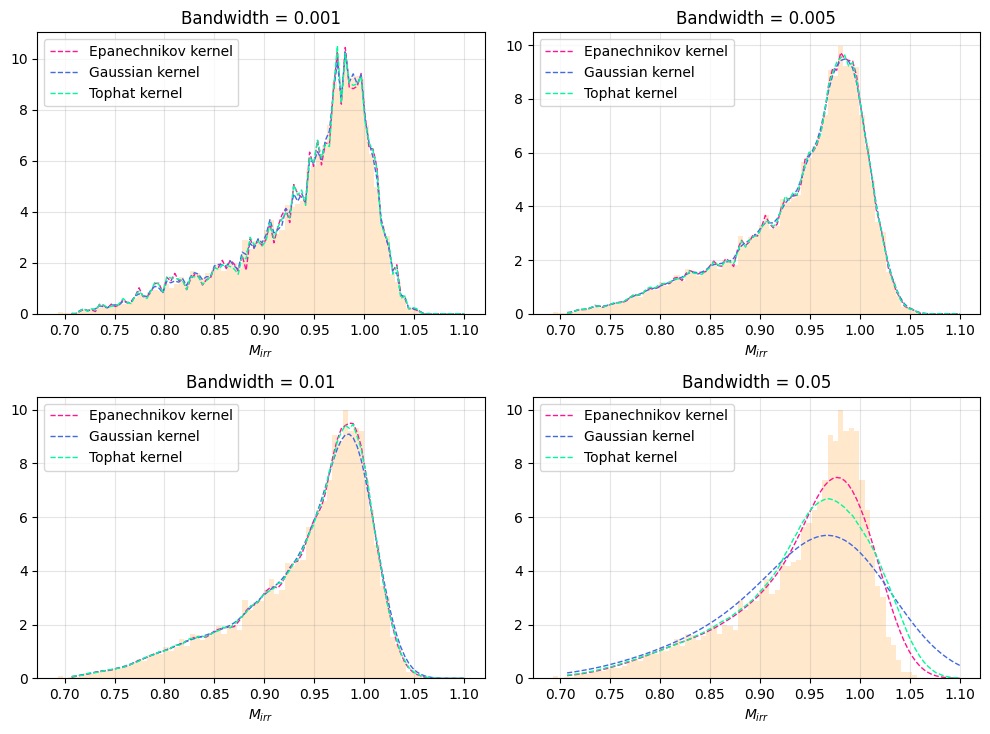

In [60]:
# Confronting three kernels (tophat, gaussian, epanechnikov) and different bandwidths

Nbins=70     # Plotting the histogram below, just to give an idea of the distribution under the KDE
bandwidth = [0.001, 0.005, 0.01, 0.05]     # Random values for now
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

#-----------------------------------------------------------------------------------
ax[0, 0].hist(m_irr, bins=Nbins, density = True, histtype = 'stepfilled', linewidth = 0.5,  color = 'darkorange', alpha = 0.2)
ax[0, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="epanechnikov", xgrid=m_irr_grid),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[0, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="gaussian", xgrid=m_irr_grid),
              c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[0, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[0],kernel="tophat", xgrid=m_irr_grid),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[0, 0].grid(c='grey', alpha = 0.2)
ax[0, 0].legend()
ax[0, 0].set_title('Bandwidth = ' + str(bandwidth[0]))
ax[0, 0].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[0, 1].hist(m_irr, bins=Nbins, density = True, histtype = 'stepfilled', linewidth = 0.5,  color = 'darkorange', alpha = 0.2)
ax[0, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="epanechnikov", xgrid=m_irr_grid),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[0, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="gaussian", xgrid=m_irr_grid),
              c = 'royalblue', lw = 1, ls='--', label = 'Gaussian kernel')
ax[0, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[1],kernel="tophat", xgrid=m_irr_grid),
              c = 'mediumspringgreen', lw = 1, ls='--', label = 'Tophat kernel')
ax[0, 1].grid(c='grey', alpha = 0.2)
ax[0, 1].legend()
ax[0, 1].set_title('Bandwidth = ' + str(bandwidth[1]))
ax[0, 1].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[1, 0].hist(m_irr, bins=Nbins, density = True, histtype = 'stepfilled', linewidth = 0.5,  color = 'darkorange', alpha = 0.2)
ax[1, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="epanechnikov", xgrid=m_irr_grid),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[1, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="gaussian", xgrid=m_irr_grid),
              c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[1, 0].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[2],kernel="tophat", xgrid=m_irr_grid),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[1, 0].grid(c='grey', alpha = 0.2)
ax[1, 0].legend()
ax[1, 0].set_title('Bandwidth = ' + str(bandwidth[2]))
ax[1, 0].set_xlabel('$M_{irr}$')

#-----------------------------------------------------------------------------------
ax[1, 1].hist(m_irr, bins=Nbins, density = True, histtype = 'stepfilled', linewidth = 0.5,  color = 'darkorange', alpha = 0.2)
ax[1, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="epanechnikov", xgrid=m_irr_grid),
              c = 'deeppink', lw = 1, ls='--', label = 'Epanechnikov kernel')
ax[1, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="gaussian", xgrid=m_irr_grid),
               c = 'royalblue', lw = 1, ls = '--', label = 'Gaussian kernel')
ax[1, 1].plot(m_irr_grid, kde_sklearn(m_irr,bandwidth=bandwidth[3],kernel="tophat", xgrid=m_irr_grid),
              c = 'mediumspringgreen', lw = 1, ls = '--', label = 'Tophat kernel')
ax[1, 1].grid(c='grey', alpha = 0.2)
ax[1, 1].legend()
ax[1, 1].set_title('Bandwidth = ' + str(bandwidth[3]))
ax[1, 1].set_xlabel('$M_{irr}$')

plt.subplots_adjust(hspace=0.2)  
plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=1.5)
plt.show()

Judging by eye, the best bandwidth seems to be $bw=0.01$. Let's run a cross-validation process to find the best option, for example, for the gaussian kernel:

In [61]:
bandwidths = np.linspace(0.001, 0.05, 30)
print(bandwidths)
cv = 10

grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidths, 'kernel': ['gaussian']}, cv=cv)
grid.fit(m_irr[:, np.newaxis])
bw_opt = grid.best_params_['bandwidth']

print('\nThe best bandwidth value out of the proposed ones is bw = %.4f' % bw_opt)

[0.001      0.00268966 0.00437931 0.00606897 0.00775862 0.00944828
 0.01113793 0.01282759 0.01451724 0.0162069  0.01789655 0.01958621
 0.02127586 0.02296552 0.02465517 0.02634483 0.02803448 0.02972414
 0.03141379 0.03310345 0.0347931  0.03648276 0.03817241 0.03986207
 0.04155172 0.04324138 0.04493103 0.04662069 0.04831034 0.05      ]

The best bandwidth value out of the proposed ones is bw = 0.0061


We can now plot the corresponding KDE and compare it with the mathematical distribution:

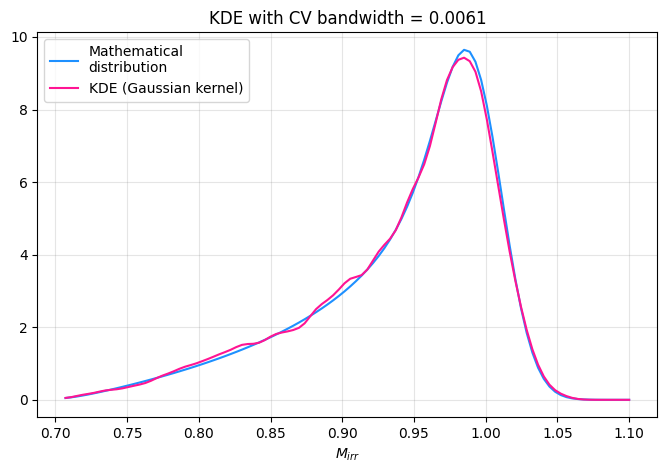

In [62]:
plt.figure(figsize=(8, 5))

plt.plot(m_irr_grid, m_irr_distr, color = 'dodgerblue', lw = 1.5, label = 'Mathematical\ndistribution')
plt.plot(m_irr_grid, kde_sklearn(m_irr, bandwidth=bw_opt, kernel="gaussian", xgrid=m_irr_grid),
              c = 'deeppink', lw = 1.5, label = 'KDE (Gaussian kernel)')
plt.xlabel('$M_{irr}$')
plt.title('KDE with CV bandwidth = %.4f' % bw_opt)
plt.grid(c='grey', alpha = 0.2)
plt.legend()
plt.show()

### KS test

We want to compute the KS distance between $M_{irr}$ and $f$ and $M_{irr}$ and $M$ as a function of $\sigma$, focusing on the two limits $\sigma<<\mu$ and $\sigma>>\mu$. 

First, we can show how the $M_{irr}$ pdf should behave under the two limits:

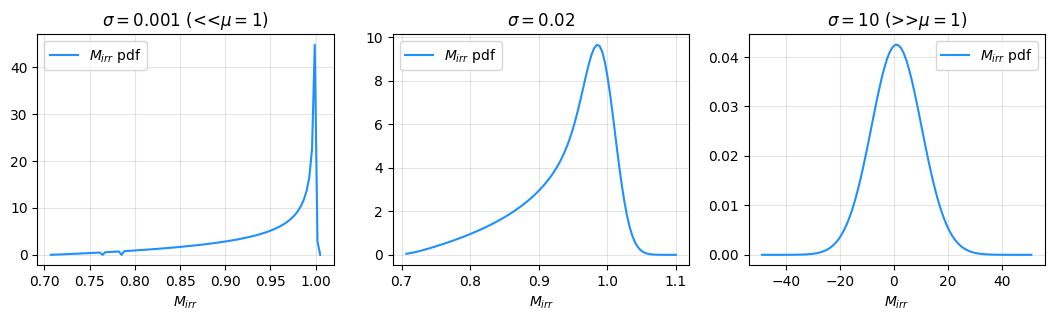

In [79]:
fig, ax = plt.subplots(1, 3, figsize = (13, 3))

scales = [0.001, 0.02, 10]

for i, scale in enumerate(scales):
    
    M_irr_grid = np.linspace(min(1-5*scale, 1/2**0.5), 1+5*scale, 100)
    M_irr_distr = [scipy.integrate.quad(lambda f: integrand(f, x, scale), 1/2**0.5, 1)[0] for x in M_irr_grid]

    ax[i].plot(M_irr_grid, M_irr_distr, color = 'dodgerblue', lw = 1.5, label = '$M_{irr}$ pdf')
    ax[i].grid(c='grey', alpha = 0.2)
    ax[i].legend()
    ax[i].set_xlabel('$M_{irr}$')

ax[0].set_title('$\\sigma=$%.3f (<<$\\mu=1$)' % scales[0])
ax[1].set_title('$\\sigma=$%.2f' % scales[1])
ax[2].set_title('$\\sigma=$%i (>>$\\mu=1$)' % scales[2])

plt.show()

So:

- for $\sigma<<\mu$, $M_{irr}$ should be distributed as $f$;
- for $\sigma>>\mu$, $M_{irr}$ should be distributed as $M$.

On to the KS test:

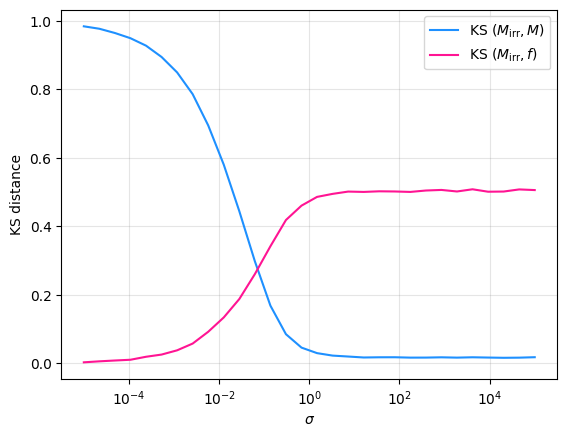

In [80]:
scales = np.logspace(-5, 5, 30)

ksM = []
ksf = []

chi = np.random.uniform(0, 1, N)
f = f_func(chi)

for i, scale in enumerate(scales):

    M = np.random.normal(loc = 1, scale = scale, size = N)

    ksM.append(scipy.stats.ks_2samp(M, M*f))
    ksf.append(scipy.stats.ks_2samp(f, M*f))

ksM = np.array(ksM)
ksf = np.array(ksf)

plt.plot(scales, ksM[:,0], color = 'dodgerblue', label="KS $(M_{\\rm irr}, M)$")
plt.plot(scales, ksf[:,0], color = 'deeppink', label="KS $(M_{\\rm irr}, f)$")
plt.semilogx()
plt.xlabel("$\\sigma$")
plt.ylabel('KS distance')
plt.grid(c='grey', alpha = 0.2)
plt.legend()
plt.show()

This graph tells us that for $\sigma<<\mu$, the KS distance between $M_{irr}$ and $f$ is zero, meaning that the distributions are the same. For $\sigma>>\mu$, instead, we find that the KS distance between $M_{irr}$ and $M$ is zero, as we expected.